# Spectra Compiler

Download all the Jupyter notebooks from: https://github.com/HeloiseS/hoki_tutorials

## Initial Imports

In [1]:
from hoki.constants import *
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.style.use('tuto.mplstyle')

### In this tutorial you will learn: 

- The `SpectraCompiler` class to compile `spectra` files.
- The `hoki.load.all_spectra` function to read a compiled `spectra` file or compile the file for you.

The `SpectraCompiler` class is the base of the loader function. The `hoki.load.all_spectra` function is more convenient to use, but the class might be necessary in specific casses.


# The `hoki.load.all_spectra` Function

BPASS output files are non-binary files, such that they are accessible. However, it significantly increases I/O times. 
Therefore, the BPASS spectra can be compiled to a `numpy` binary file using `hoki.load.all_spectra`.

**!!! Warning !!!**

If you want this notebook to work, you have to set `path_to_spectra` to the BPASS folder where the `spectra` files are located. If you downloaded them straight off the [google drive](https://drive.google.com/drive/u/1/folders/1GfMSO2ZiIabHSQRh7zTA3I51DPGbmtAB), it'll probably have a name like `bpass_v2.2.1_imf135_300`

In [2]:
path_to_spectra = "../BPASS_hoki_dev/bpass_v2.2.1_imf135_300"

`hoki.load.all_spectra` will check if a compiled binary file is present in the given directory. If this is not the case, it will search for the BPASS files in the `path_to_spectra` folder and compile the binary file for you. 

In either case, it will return a `numpy.ndarray` containing the BPASS spectra for all metallicities as they are provided.

Besides requiring the path to the `spectra` files the loader need a IMF identifier, which can be found in the [documentation]().

It also takes the option if the binary or single star populations are loaded. In the default setting, it loads the binary files.

In [3]:
from hoki import load

In [4]:
spec = load.all_spectra(path_to_spectra,"imf135_300", binary=True)

Trying to load precompiled file.
Done Loading.


**Rerunning the above cell, will now load the spectra from the stored binary file.**

Using `spec` we can now access the spectra in a numpy array format. As the `load.all_spectra` [documentation]() tells us, it is a 13x51x100000 matrix, where the axis are metalicity, age, and wavelength.

The metallicity are BPASS metallicities and folllow `BPASS_NUM_METALLICITIES`. So the first index `spectra[0]` is the metallicity at `BPASS_NUM_METALLICITIES[0]`. Similarly, the age follows the BPASS ages (`BPASS_TIME_BINS`). In log space these run from 6.0 till 11.0 with 0.1 dex steps.

In [5]:
# gives the spectrum at 1e-5 metallicity for a population that's 10^6.3 years old
spec1 = spec[0, 3]

# gives the spectrum at 0.02 metallicity for a population that's  10^10 years old
spec2 = spec[10,40]

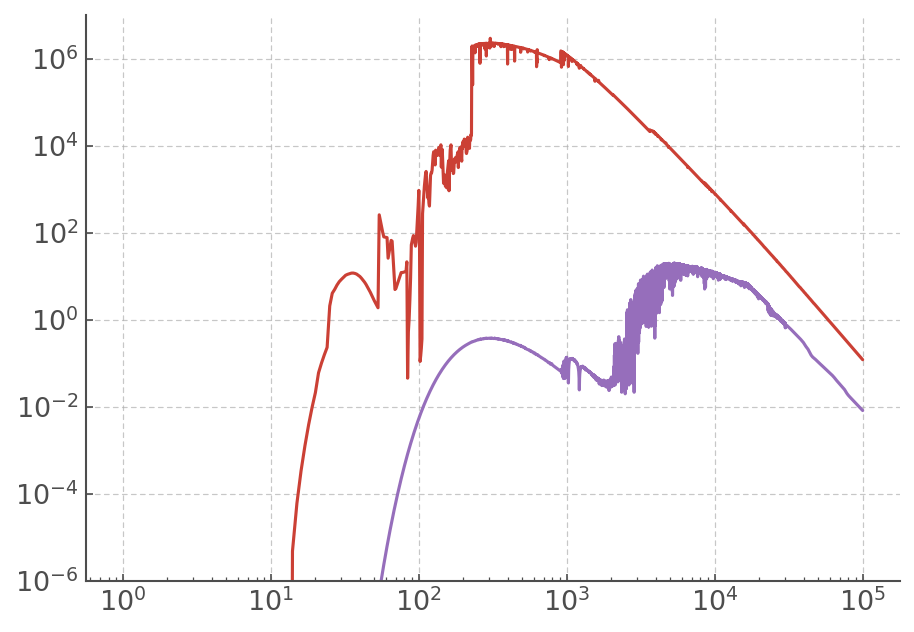

In [10]:
plt.plot(np.arange(1,100001), spec1)
plt.plot(np.arange(1,100001), spec2)
plt.ylim(1e-6, 1e7)
plt.xscale('log')
plt.yscale('log')
plt.show()

# The `SpectraCompiler` class

This is the underlying class that reads and stores the spectra from the data folder. It is less convenient, but provides a little more freedom, because it takes both a input and output path, `path_to_spectra` and `output_path`, respectively. It will always compile the spectra into a binary file, even if one is already present.

It will save a binary `numpy` file and make the spectra available through `SpectraCompiler.spectra`.

Besides needing the `path_to_spectra` and `output_path`, it needs an imf identifier. These can be found in the [documentation]().

In [7]:
from hoki.data_compilers import SpectraCompiler

In [8]:
# Store output in the current directory
output_path = "."
spec_compiler = SpectraCompiler(path_to_spectra, "data/", "imf135_300", verbose=True)

*************************************************
*******    YOUR DATA IS BEING COMPILED     ******
*************************************************


This may take a while ;)
Go get yourself a cup of tea, sit back and relax
I'm working for you boo!

NOTE: The progress bar doesn't move smoothly - it might accelerate or slow down - it'dc perfectly normal :D
 |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.00% 
Spectra file stored in . as 'all_spectra-bin-imf135_300.npy'



*************************************************
*******     JOB DONE! HAPPY SCIENCING!     ******
*************************************************


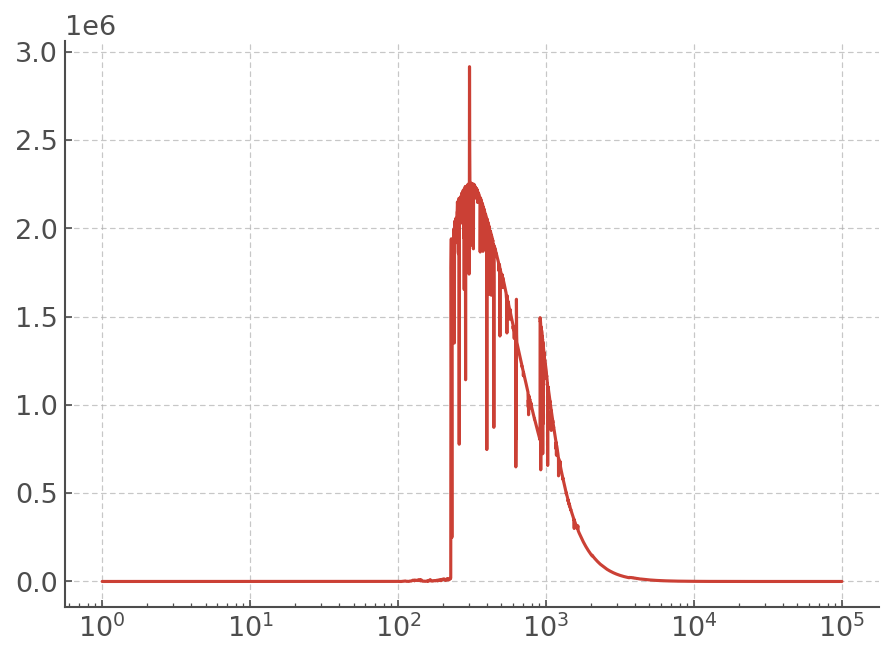

In [9]:
# gives the spectrum at 1e-5 metallicity for a population that's 10^6.3 years old
plt.plot(np.arange(1, 100001), spec_compiler.spectra[0, 3])
plt.xscale('log')
plt.show()